# Network Analysis of Tech News Subreddit

Analysis of one week of interactions between users of the subreddit r/technews for one week in 2020 that had the most posts.  This data was pulled for a different project that examined topic modeling of tech news headlines. 

In [2]:
import pickle
import pandas as pd
import numpy as np
import datetime
import networkx as nx
import operator
import matplotlib.pyplot as plt

## Prepare Edge List

In [3]:
# r/technews posts pulled and saved for another project using NLP

In [4]:
with open('../tech_news/filtered_technews_posts.pickle', 'rb') as read_file:
    posts = pickle.load(read_file)
    
posts.head()

,id,created_utc,date_time,author,author_fullname,title,url,domain,num_comments,score,permalink,full_link,refine_title
0,29j6ov,1404184792,2014-07-01 03:19:52,Password_is_123456,t2_6crtu,New leaks show off the iPhone 6's curved edged...,http://www.cnet.com/news/new-leaks-show-off-up...,cnet.com,0,0,/r/technews/comments/29j6ov/new_leaks_show_off...,https://www.reddit.com/r/technews/comments/29j...,New leaks show off the iPhone 6's curved edged...
1,29j6op,1404184791,2014-07-01 03:19:51,Password_is_123456,t2_6crtu,Millions of dynamic DNS users suffer after Mic...,http://arstechnica.com/security/2014/06/millio...,arstechnica.com,6,63,/r/technews/comments/29j6op/millions_of_dynami...,https://www.reddit.com/r/technews/comments/29j...,Millions of dynamic DNS users suffer after Mic...
2,29j2c1,1404181722,2014-07-01 02:28:42,[deleted],NaN,Paypal Freezes ProtonMail Campaign Funds,https://protonmail.ch/blog/paypal-freezes-prot...,protonmail.ch,0,1,/r/technews/comments/29j2c1/paypal_freezes_pro...,https://www.reddit.com/r/technews/comments/29j...,Paypal Freezes ProtonMail Campaign Funds
3,29hy6f,1404156644,2014-06-30 19:30:44,ANIMAL_NewYork,t2_h1mjr,UNETHICAL FACEBOOK “EMOTIONAL CONTAGION” STUDY...,http://animalnewyork.com/2014/facebook-emotion...,animalnewyork.com,0,1,/r/technews/comments/29hy6f/unethical_facebook...,https://www.reddit.com/r/technews/comments/29h...,UNETHICAL FACEBOOK “EMOTIONAL CONTAGION” STUDY...
4,29hvyr,1404155395,2014-06-30 19:09:55,Password_is_123456,t2_6crtu,Microsoft May Prioritize The Desktop In Windows 9,http://techcrunch.com/2014/06/30/microsoft-may...,techcrunch.com,23,53,/r/technews/comments/29hvyr/microsoft_may_prio...,https://www.reddit.com/r/technews/comments/29h...,Microsoft May Prioritize The Desktop In Windows 9


In [5]:
post_authors = posts[['id', 'date_time', 'author', 'author_fullname']]
post_authors.head()

,id,date_time,author,author_fullname
0,29j6ov,2014-07-01 03:19:52,Password_is_123456,t2_6crtu
1,29j6op,2014-07-01 03:19:51,Password_is_123456,t2_6crtu
2,29j2c1,2014-07-01 02:28:42,[deleted],NaN
3,29hy6f,2014-06-30 19:30:44,ANIMAL_NewYork,t2_h1mjr
4,29hvyr,2014-06-30 19:09:55,Password_is_123456,t2_6crtu


In [6]:
posts_2020 = post_authors[post_authors['date_time'] >= datetime.datetime(2020, 1,1)]
posts_2020.shape

(5142, 4)

In [7]:
posts_2020['week_yr'] = posts_2020['date_time'].apply(lambda x: x.strftime("%U"))
posts_2020.head()

<ipython-input-7-dc64abedba48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_2020['week_yr'] = posts_2020['date_time'].apply(lambda x: x.strftime("%U"))


,id,date_time,author,author_fullname,week_yr
0,eidbxe,2020-01-01 03:27:56,scydude,t2_4yu816z0,00
4,eibasf,2020-01-01 00:23:32,cambeiu,t2_rj31v,00
1,hj1vjn,2020-07-01 02:45:22,tactman,t2_2tcxe63m,26
2,hj0kbo,2020-07-01 01:17:00,weev1,t2_16u8vg,26
3,hj0juq,2020-07-01 01:16:10,weev1,t2_16u8vg,26


In [8]:
posts_2020.week_yr.unique()

array(['00', '26', '25', '24', '23', '22', '21', '20', '19', '18', '17',
       '16', '15', '14', '13', '12', '11', '10', '09', '08', '07', '06',
       '05', '04', '03', '02', '01', '52', '51', '50', '49', '48', '47',
       '46', '45', '44', '43', '42', '41', '40', '39', '38', '37', '36',
       '35', '34', '33', '32', '31', '30', '29', '28', '27'], dtype=object)

In [9]:
# find week with most posts
by_week = posts_2020.groupby('week_yr').size()

In [10]:
by_week.sort_values(ascending=False)[:3]

week_yr
19    157
14    150
11    146
dtype: int64

In [11]:
# which week is week 19
week_19 = posts_2020[posts_2020['week_yr']=='19']

print(min(week_19['date_time']))
print(max(week_19['date_time']))

2020-05-10 01:56:48
2020-05-16 23:33:59


In [12]:
# r/technews comments pulled and saved for another project using NLP

In [13]:
with open('../tech_news/technews_comments.pickle', 'rb') as read_file:
    comments = pickle.load(read_file)

In [14]:
comments.head()

,author,author_created_utc,body,created_utc,id,link_id,parent_id,permalink,retrieved_on,score,created,subreddit,updated_utc
0,wsxedcrf,1.390431e+09,"Sure, something like What's the weather? Set t...",1514775934.0,ds0v85z,t3_7m68fe,t3_7m68fe,/r/technews/comments/7m68fe/46_of_americans_us...,1.517442e+09,1.0,1.514794e+09,technews,NaN
1,SoundDr,1.363845e+09,They are just as bad as patent trolls. I love ...,1514765852.0,ds0nxpm,t3_7n92ka,t1_ds02bc5,/r/technews/comments/7n92ka/steve_jobs_is_an_i...,1.517436e+09,4.0,1.514784e+09,technews,NaN
2,negativerad,1.265179e+09,Steve Jobs,1514764847.0,ds0n4dz,t3_7n92ka,t1_ds0klv2,/r/technews/comments/7n92ka/steve_jobs_is_an_i...,1.517433e+09,1.0,1.514783e+09,technews,NaN
3,snapmehummingbirdeb,1.435642e+09,The real question is who would want to wear by...,1514761787.0,ds0klv2,t3_7n92ka,t3_7n92ka,/r/technews/comments/7n92ka/steve_jobs_is_an_i...,1.514762e+09,1.0,1.514780e+09,technews,1.514762e+09
4,autotldr,1.327942e+09,"This is the best tl;dr I could make, [original...",1514755490.0,ds0fby8,t3_7l4gfm,t3_7l4gfm,/r/technews/comments/7l4gfm/want_to_guarantee_...,1.514755e+09,1.0,1.514773e+09,technews,1.514755e+09


In [15]:
comments_authors = comments[['author', 'id', 'link_id', 'parent_id']]
comments_authors.columns = ['comment_author', 'comment_id', 'link_id', 'parent_id']
comments_authors.head()

,comment_author,comment_id,link_id,parent_id
0,wsxedcrf,ds0v85z,t3_7m68fe,t3_7m68fe
1,SoundDr,ds0nxpm,t3_7n92ka,t1_ds02bc5
2,negativerad,ds0n4dz,t3_7n92ka,t1_ds0klv2
3,snapmehummingbirdeb,ds0klv2,t3_7n92ka,t3_7n92ka
4,autotldr,ds0fby8,t3_7l4gfm,t3_7l4gfm


In [16]:
# id is the comment id
# match link_id to submission/post id
# use parent_id for network analysis, as will capture one commenter responding to another commenter 

In [17]:
comments_authors['parent'] = comments_authors['parent_id'].str[3:]
comments_authors.head()


<ipython-input-17-1a5d921542d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_authors['parent'] = comments_authors['parent_id'].str[3:]


,comment_author,comment_id,link_id,parent_id,parent
0,wsxedcrf,ds0v85z,t3_7m68fe,t3_7m68fe,7m68fe
1,SoundDr,ds0nxpm,t3_7n92ka,t1_ds02bc5,ds02bc5
2,negativerad,ds0n4dz,t3_7n92ka,t1_ds0klv2,ds0klv2
3,snapmehummingbirdeb,ds0klv2,t3_7n92ka,t3_7n92ka,7n92ka
4,autotldr,ds0fby8,t3_7l4gfm,t3_7l4gfm,7l4gfm


In [18]:
# test match of column 'parent' to posts 'id'
post_authors[post_authors['id'] == '7m68fe']

,id,date_time,author,author_fullname
166,7m68fe,2017-12-26 06:22:22,Philo1927,NaN


In [19]:
post_authors[post_authors['id'] == '7n92ka']

,id,date_time,author,author_fullname
17,7n92ka,2017-12-31 15:37:55,Philo1927,NaN


In [20]:
# first join post_authors and comment_authors
join_1 = pd.merge(week_19, comments_authors, how='left', left_on='id', right_on='parent' )

join_1.head()

,id,date_time,author,author_fullname,week_yr,comment_author,comment_id,link_id,parent_id,parent
0,gl4tf9,2020-05-16 23:33:59,ourlifeintoronto,t2_dquqv,19,communityjizz,fqvdle5,t3_gl4tf9,t3_gl4tf9,gl4tf9
1,gl1yjr,2020-05-16 20:40:49,ourlifeintoronto,t2_dquqv,19,NaN,NaN,NaN,NaN,NaN
2,gl03il,2020-05-16 18:55:09,JunezRiyaz,t2_105gby,19,elesar11,fqwc3sw,t3_gl03il,t3_gl03il,gl03il
3,gl03il,2020-05-16 18:55:09,JunezRiyaz,t2_105gby,19,evanwt,fquglod,t3_gl03il,t3_gl03il,gl03il
4,gkza9m,2020-05-16 18:10:25,CrypticParadigm,t2_shf93xv,19,tomonota,frrrwn3,t3_gkza9m,t3_gkza9m,gkza9m


In [21]:
join_1.shape

(1518, 10)

In [22]:
filter_join1 = join_1[~join_1['comment_id'].isin([np.nan])]
filter_join1.head()

,id,date_time,author,author_fullname,week_yr,comment_author,comment_id,link_id,parent_id,parent
0,gl4tf9,2020-05-16 23:33:59,ourlifeintoronto,t2_dquqv,19,communityjizz,fqvdle5,t3_gl4tf9,t3_gl4tf9,gl4tf9
2,gl03il,2020-05-16 18:55:09,JunezRiyaz,t2_105gby,19,elesar11,fqwc3sw,t3_gl03il,t3_gl03il,gl03il
3,gl03il,2020-05-16 18:55:09,JunezRiyaz,t2_105gby,19,evanwt,fquglod,t3_gl03il,t3_gl03il,gl03il
4,gkza9m,2020-05-16 18:10:25,CrypticParadigm,t2_shf93xv,19,tomonota,frrrwn3,t3_gkza9m,t3_gkza9m,gkza9m
5,gkza9m,2020-05-16 18:10:25,CrypticParadigm,t2_shf93xv,19,NumerousApplication3,frkmpuq,t3_gkza9m,t3_gkza9m,gkza9m


In [23]:
filter_join1.shape

(1425, 10)

In [24]:
# comments on posts
n1_c_p = filter_join1[['comment_author', 'author', 'id']]

n1_c_p.columns =['source', 'target', 'post_id']

n1_c_p.shape

(1425, 3)

In [25]:
n1_c_p.head()

,source,target,post_id
0,communityjizz,ourlifeintoronto,gl4tf9
2,elesar11,JunezRiyaz,gl03il
3,evanwt,JunezRiyaz,gl03il
4,tomonota,CrypticParadigm,gkza9m
5,NumerousApplication3,CrypticParadigm,gkza9m


In [26]:
# to get where comment response to another comment
# join comment_authors

join_2 = pd.merge(comments_authors, comments_authors, how='left', left_on='comment_id', right_on='parent')
join_2.head()

,comment_author_x,comment_id_x,link_id_x,parent_id_x,parent_x,comment_author_y,comment_id_y,link_id_y,parent_id_y,parent_y
0,wsxedcrf,ds0v85z,t3_7m68fe,t3_7m68fe,7m68fe,NaN,NaN,NaN,NaN,NaN
1,SoundDr,ds0nxpm,t3_7n92ka,t1_ds02bc5,ds02bc5,NaN,NaN,NaN,NaN,NaN
2,negativerad,ds0n4dz,t3_7n92ka,t1_ds0klv2,ds0klv2,NaN,NaN,NaN,NaN,NaN
3,snapmehummingbirdeb,ds0klv2,t3_7n92ka,t3_7n92ka,7n92ka,negativerad,ds0n4dz,t3_7n92ka,t1_ds0klv2,ds0klv2
4,autotldr,ds0fby8,t3_7l4gfm,t3_7l4gfm,7l4gfm,NaN,NaN,NaN,NaN,NaN


In [27]:
filter_join2 = join_2[~join_2['comment_id_y'].isin([np.nan])]
filter_join2.head()

,comment_author_x,comment_id_x,link_id_x,parent_id_x,parent_x,comment_author_y,comment_id_y,link_id_y,parent_id_y,parent_y
3,snapmehummingbirdeb,ds0klv2,t3_7n92ka,t3_7n92ka,7n92ka,negativerad,ds0n4dz,t3_7n92ka,t1_ds0klv2,ds0klv2
6,illiller,ds02bc5,t3_7n92ka,t3_7n92ka,7n92ka,SoundDr,ds0nxpm,t3_7n92ka,t1_ds02bc5,ds02bc5
14,pintocat,dryla9d,t3_7n0n1b,t3_7n0n1b,7n0n1b,DONTuseGoogle,drypllz,t3_7n0n1b,t1_dryla9d,dryla9d
15,hidora,dryiypm,t3_7mx6fo,t1_drxlcr1,drxlcr1,Hypoglybetic,ds2chdw,t3_7mx6fo,t1_dryiypm,dryiypm
18,lordnecro,drybonk,t3_7mx6fo,t3_7mx6fo,7mx6fo,Rohaq,dryc3ve,t3_7mx6fo,t1_drybonk,drybonk


In [28]:
filter_join2.shape

(197911, 10)

In [29]:
# keep only the comments to week 19 posts
list_wk = week_19['id'].to_list()
list_wk[:5]


['gl4tf9', 'gl1yjr', 'gl03il', 'gkza9m', 'gkty6o']

In [30]:
filter2_join2 = filter_join2[filter_join2['link_id_x'].str[3:].isin(list_wk)]
filter2_join2.shape

(4678, 10)

In [31]:
filter2_join2.head()

,comment_author_x,comment_id_x,link_id_x,parent_id_x,parent_x,comment_author_y,comment_id_y,link_id_y,parent_id_y,parent_y
26408,morawn,ft1le28,t3_gj18os,t1_ft0rkh0,ft0rkh0,Positronic_Matrix,ft2oqzy,t3_gj18os,t1_ft1le28,ft1le28
26414,morawn,ft1i7ua,t3_gj18os,t1_ft0rkh0,ft0rkh0,Positronic_Matrix,ft1j7pk,t3_gj18os,t1_ft1i7ua,ft1i7ua
26445,Positronic_Matrix,ft0rkh0,t3_gj18os,t1_fridnoz,fridnoz,morawn,ft1le28,t3_gj18os,t1_ft0rkh0,ft0rkh0
26446,Positronic_Matrix,ft0rkh0,t3_gj18os,t1_fridnoz,fridnoz,morawn,ft1i7ua,t3_gj18os,t1_ft0rkh0,ft0rkh0
27160,saifaljaidi1991,fsqiso6,t3_gi2bhu,t1_fsqioy5,fsqioy5,FreeThoughts22,fsqj7jr,t3_gi2bhu,t1_fsqiso6,fsqiso6


In [32]:
# comments on other comments
n2_c_c  = filter2_join2[['comment_author_y', 'comment_author_x', 'link_id_x']]
n2_c_c.shape

(4678, 3)

In [33]:
n2_c_c.head()

,comment_author_y,comment_author_x,link_id_x
26408,Positronic_Matrix,morawn,t3_gj18os
26414,Positronic_Matrix,morawn,t3_gj18os
26445,morawn,Positronic_Matrix,t3_gj18os
26446,morawn,Positronic_Matrix,t3_gj18os
27160,FreeThoughts22,saifaljaidi1991,t3_gi2bhu


In [34]:
n2_c_c.columns = ['source', 'target', 'post_id']

In [35]:
network_data = pd.concat([n1_c_p, n2_c_c], axis=0)
network_data.shape

(6103, 3)

In [37]:
#aggregate number of times one user responded to another
network_agg = network_data[['source','target', 'post_id']].groupby(['source', 'target']).count().reset_index()

network_agg.head()

,source,target,post_id
0,-HHANZO-,limache,1
1,-This-Machine-,MaroonHawk27,2
2,-This-Machine-,phstock,2
3,-richthealchemist-,totatree,1
4,000AJ000,limache,1


In [38]:
network_agg.sort_values(by='post_id', ascending=False).head(5)

,source,target,post_id
1788,PhoMeSideways,TheNoize,13
2328,TheNoize,PhoMeSideways,13
4074,morbidgull,kraenk12,10
1940,RobloxLover369421,TheOkComputerGuy,9
3329,feejazz,Sgt-GiggleFarts,8


In [39]:
network_agg.columns = ['source','target', 'count']

In [40]:
network_agg[network_agg['count'] > 5].sample(5)

,source,target,count
3700,justforfungus,p_hennessey,8
2328,TheNoize,PhoMeSideways,13
3406,gizamo,Nicknamedreddit,6
2519,VampireQueenDespair,ghostoutlaw,6
4074,morbidgull,kraenk12,10


In [41]:
network_agg.shape

(5224, 3)

In [42]:
network_example = network_agg.copy()

## Define the Network

In [43]:
G = nx.from_pandas_edgelist(network_example, source="source", target="target", edge_attr=True, create_using=nx.DiGraph())
G

In [44]:
#G.edges(data=True)

In [45]:
#G.nodes(data=True)

## Network Size

In [46]:
# COUNT NODES
len(G)
#OR
len(G.nodes())
#OR
nodes = nx.number_of_nodes(G)


# COUNT EDGES
len(G.edges())
#OR
edges = nx.number_of_edges(G)

print(f"This network has {nodes} nodes and {edges} edges.")

This network has 3461 nodes and 5224 edges.


## Centrality Measures

In [47]:
# degree centrality
degree_centrality = nx.degree_centrality(G)
# returns a dictionary of each node and the node's degree centrality 

sorted_degree = dict(sorted(degree_centrality.items(), key=operator.itemgetter(1),reverse=True))

# Top 5 nodes with highest degree centrality
list(sorted_degree)[:5]

['totatree', 'limache', 'ourlifeintoronto', 'roxanneonreddit', 'hash0t0']

In [48]:
# betweenness centrality
between_centrality = nx.betweenness_centrality(G)
sorted_btw = dict(sorted(between_centrality.items(), key=operator.itemgetter(1),reverse=True))
list(sorted_btw)[:5]

['limache', 'p_hennessey', 'Gffcom', 'nwmisseb', 'feejazz']

In [49]:
# closeness centrality
close = nx.closeness_centrality(G)
sorted_close = dict(sorted(close.items(), key=operator.itemgetter(1),reverse=True))
list(sorted_close)[:5]

['totatree',
 'roxanneonreddit',
 'Godlike_Blast58',
 'ourlifeintoronto',
 'kyletmayberry']

In [50]:
# page rank
page_rank = nx.pagerank(G)
sorted_pgrk = dict(sorted(page_rank.items(), key=operator.itemgetter(1),reverse=True))
list(sorted_pgrk)[:5]

['limache',
 'totatree',
 'Godlike_Blast58',
 'ourlifeintoronto',
 'roxanneonreddit']

In [51]:
# add the centrality measures as node attributes
nx.set_node_attributes(G, degree_centrality, name='dgr_centrality')
nx.set_node_attributes(G, page_rank, name='pg_rank')


In [52]:
#G.edges(data=True)

In [53]:
#G.nodes(data=True)

## Neighbors of Important Nodes

In [54]:
limache_neighbors = list(nx.all_neighbors(G, 'limache'))
len(limache_neighbors)

207

In [55]:
totatree_neighbors = list(nx.all_neighbors(G, 'totatree'))
len(totatree_neighbors)

283

## Node Degree

In [56]:
G.in_degree('totatree') 

283

In [57]:
G.out_degree('totatree')

0

In [58]:
G.in_degree('limache')

166

In [59]:
G.out_degree('limache')

41

## Network of Important Node

In [60]:
G_subset_df = network_agg[(network_agg['source']=='limache') | (network_agg['target'] == 'limache')]

G_subset_df.shape

(206, 3)

In [61]:
G_subset_df.head()

,source,target,count
0,-HHANZO-,limache,1
4,000AJ000,limache,1
29,1980-Something,limache,1
70,789-OMG,limache,1
120,ActionMan48,limache,1


In [62]:
G_subset = nx.from_pandas_edgelist(G_subset_df, source='source', target='target', edge_attr='count', create_using=nx.DiGraph())

## Network Visualization

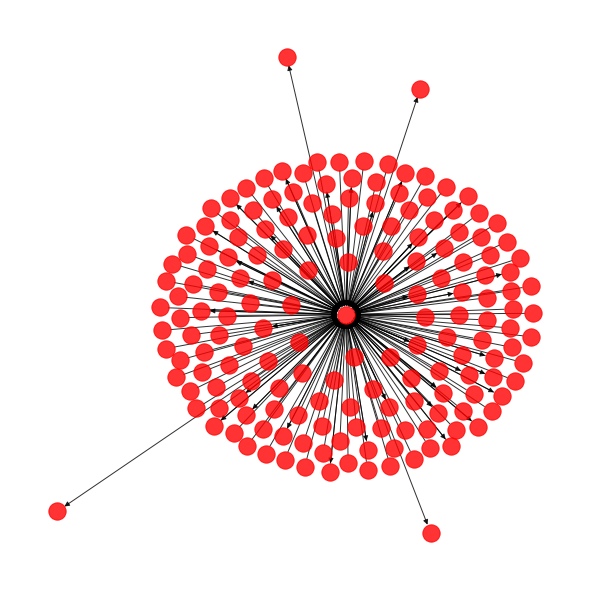

In [63]:
plt.rcParams['figure.figsize'] = [8, 8]

nx.draw(G_subset, 
       pos = nx.spring_layout(G_subset, iterations=25, k=0.2, scale=0.5), # k helps determine the distance between nodes      
       #width=.5, 
       node_color='red',
       alpha=0.8, # tranparency of node
       with_labels=False )

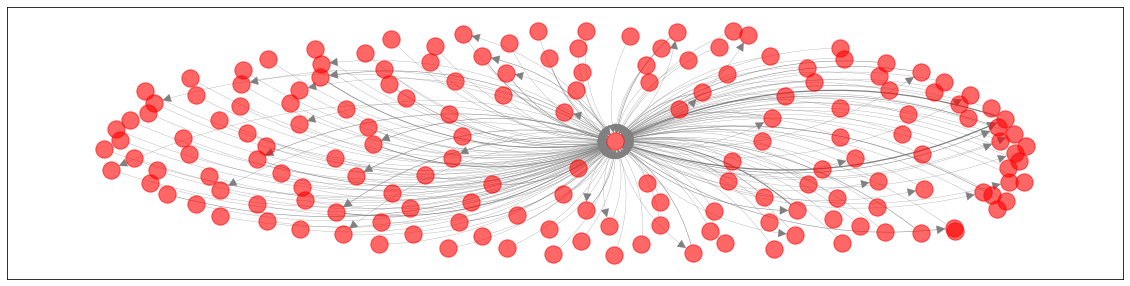

In [64]:
plt.rcParams['figure.figsize'] = [20, 5]

# Specify a layout algorithm 
pos = nx.spring_layout(G_subset,
                      iterations=100, 
                      k=0.75, 
                      scale=0.5,                    
                      seed=100)


nx.draw_networkx_nodes(G_subset, pos, node_color='red', alpha=0.6)

# weight edge size by an attribute in directed graph
edge_size = [0.25 * nx.get_edge_attributes(G_subset, 'count')[(u,v)] for u,v in G_subset.edges] 

nx.draw_networkx_edges(G_subset, pos, connectionstyle='arc3,rad=0.2', edge_color='gray', width=edge_size, arrowstyle='-|>', arrowsize=20)

# Uncomment to have labels
## draw_networkx_labels(G_subset, pos)

plt.savefig('subset_G_graph2.jpeg');  # blog platform does not accept SVG files
plt.show()

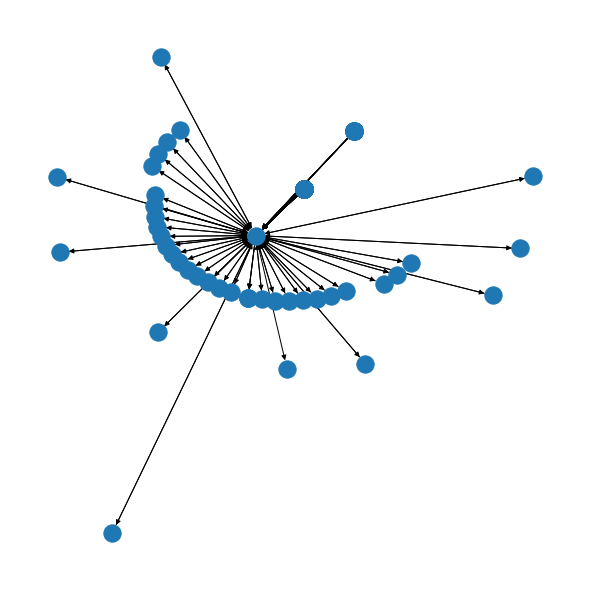

In [65]:
plt.rcParams['figure.figsize'] = [8, 8]
nx.draw(G_subset, nx.kamada_kawai_layout(G_subset, weight='count'))

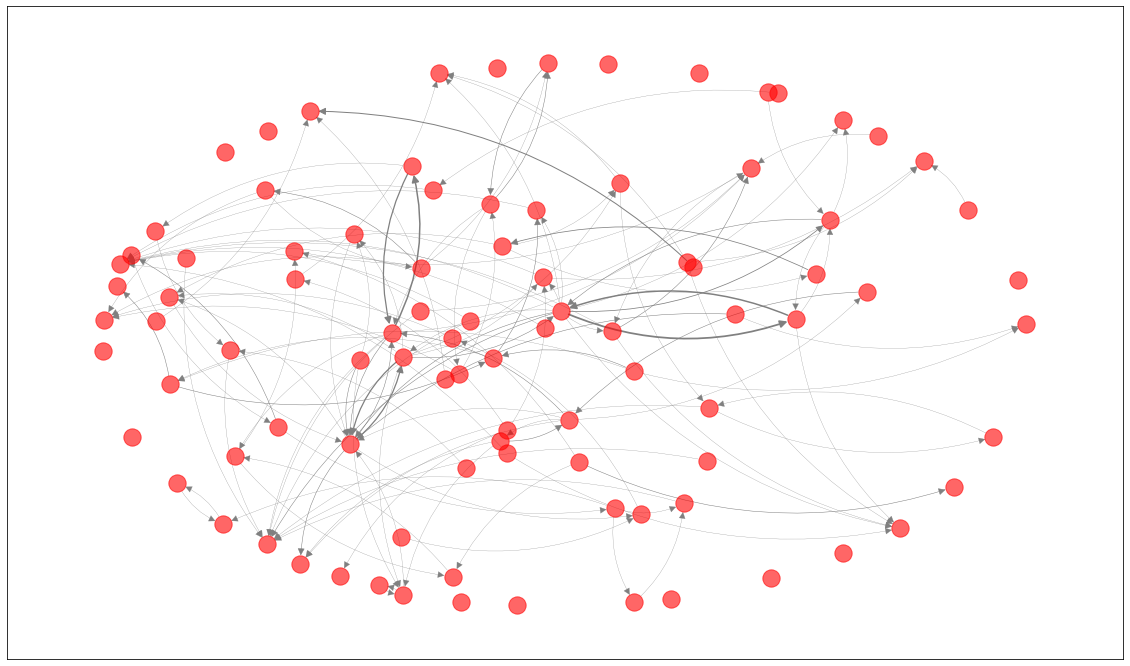

In [72]:
# filter network to nodes with at least 12 edges
high_dgr = [node for node, degree in dict(G.degree()).items() if degree>=12]

SG = nx.subgraph(G, high_dgr)

plt.rcParams['figure.figsize'] = [20, 12]

# Specify a layout algorithm 
pos = nx.spring_layout(SG,
                      iterations=500, 
                      k=5, 
                      scale=1,                    
                      seed=100)

nx.draw_networkx_nodes(SG, pos, node_color='red', alpha=0.6) 

# weight edge size by an attribute in directed graph
edge_sizes = [0.25 * nx.get_edge_attributes(SG, 'count')[(u,v)] for u,v in SG.edges] 

nx.draw_networkx_edges(SG, pos, connectionstyle='arc3,rad=0.2', edge_color='gray', 
                       width=edge_sizes, arrowstyle='-|>', arrowsize=15)

# Uncomment to have labels
#nx.draw_networkx_labels(SG, pos)

plt.savefig('SG_graph_viz.jpeg');
plt.show()

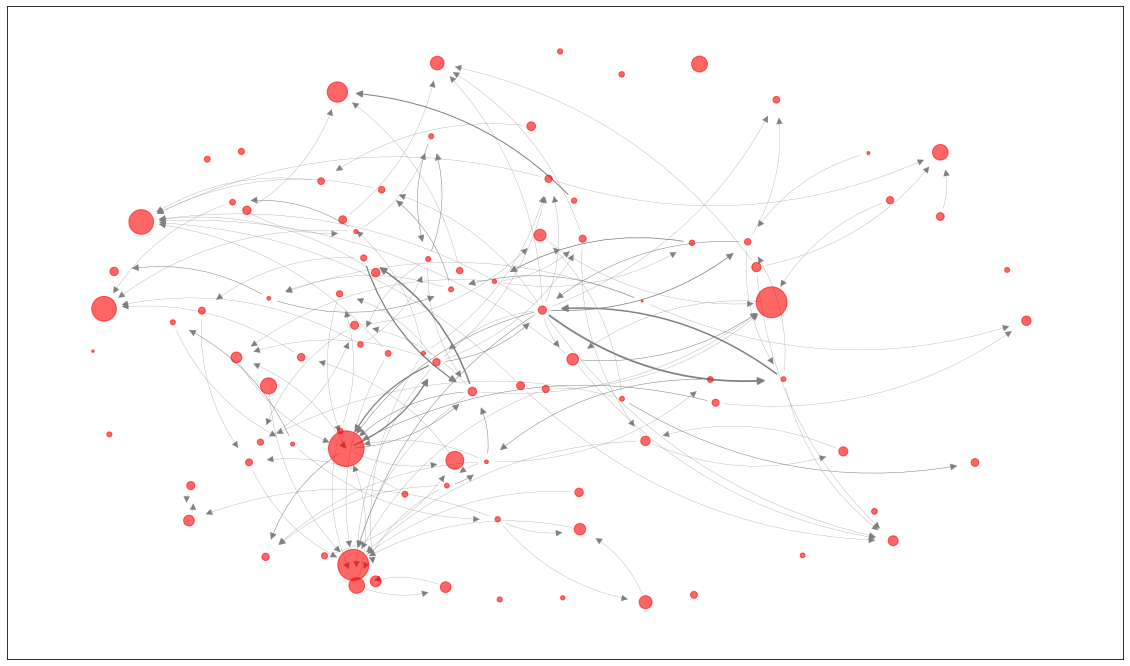

In [73]:
plt.rcParams['figure.figsize'] = [20, 12]

# Specify a layout algorithm 
pos = nx.spring_layout(SG,
                      iterations=100, 
                      k=0.75, 
                      scale=0.5,                    
                      seed=100)

# larger node size for higher page rank centrality
node_sizes = [30_000 * nx.get_node_attributes(SG, 'pg_rank')[v] for v in SG] 

nx.draw_networkx_nodes(SG, pos, node_color='red', alpha=0.6, node_size=node_sizes)

# weight edge size by an attribute in directed graph
edge_sizes = [0.25 * nx.get_edge_attributes(SG, 'count')[(u,v)] for u,v in SG.edges] 

nx.draw_networkx_edges(SG, pos, connectionstyle='arc3,rad=0.2', edge_color='gray', 
                       width=edge_sizes, arrowstyle='-|>', arrowsize=15, min_target_margin=18)

# Uncomment to have labels
## draw_networkx_labels(G_subset, pos)

plt.savefig('SG_graph_viz2.svg');
plt.show()

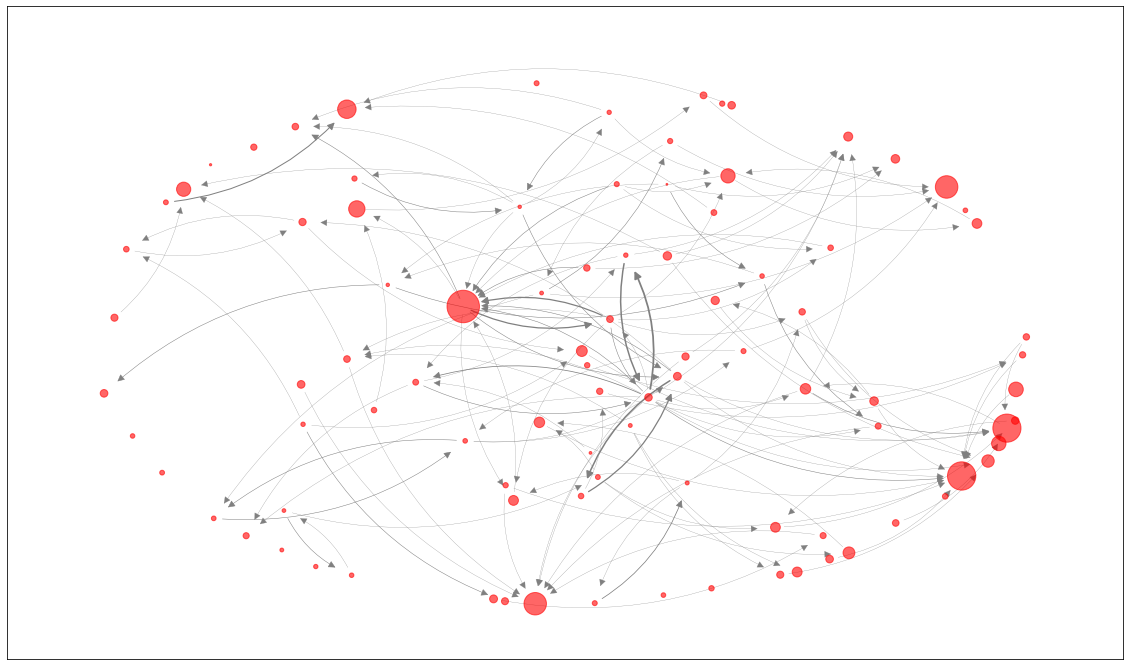

In [481]:
plt.rcParams['figure.figsize'] = [20, 12]

# Specify a layout algorithm 
pos = nx.spring_layout(SG,
                      iterations=500, 
                      k=5, 
                      scale=1,                    
                      seed=100)

# larger node size for higher page rank centrality
node_sizes = [25_000 * nx.get_node_attributes(SG, 'pg_rank')[v] for v in SG] 

nx.draw_networkx_nodes(SG, pos, node_color='red', alpha=0.6, node_size=node_sizes)

# weight edge size by an attribute in directed graph
edge_sizes = [0.25 * nx.get_edge_attributes(SG, 'count')[(u,v)] for u,v in SG.edges] 

nx.draw_networkx_edges(SG, pos, connectionstyle='arc3,rad=0.2', edge_color='gray', 
                       width=edge_sizes, arrowstyle='-|>', arrowsize=15, min_target_margin=18)

# Uncomment to have labels
#nx.draw_networkx_labels(SG, pos)

plt.savefig('SG_graph_viz3.svg');
plt.show()

## Export to GraphML file

In [74]:
# Export to GraphML file to examine visualization in Gephi

nx.write_graphml(G, 'G_all_nx.graphml')
nx.write_graphml(G_subset, 'G_subset_nx.graphml')